In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])

In [3]:
# cleaning data removing top 2.5% & bottom 2.5%
bottom_25 = df['value'] >= df['value'].quantile(0.025) 
top_25 = df['value'] <= df['value'].quantile(0.975)
df = df[bottom_25 & top_25]

## fig 01

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

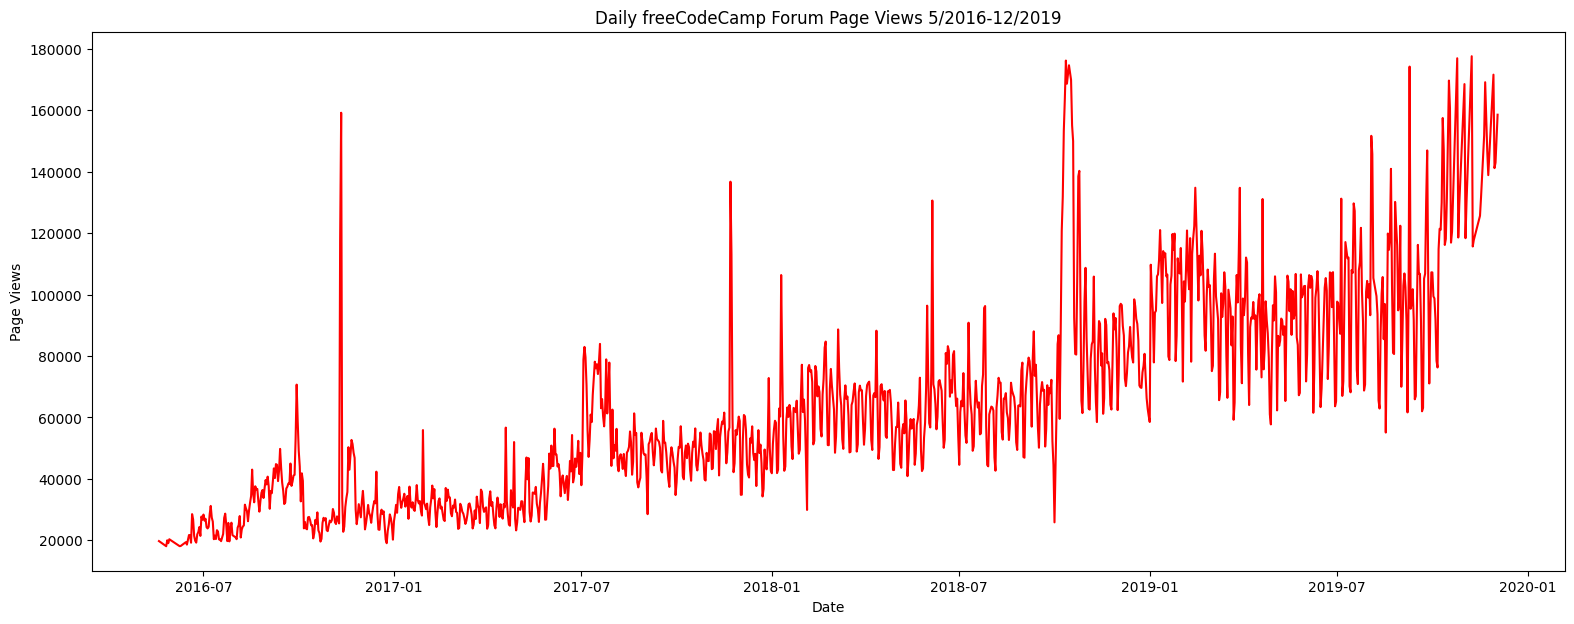

In [4]:
# drawing line plot
# seaborn
fig, ax = plt.subplots(figsize=(19, 7))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
sns.lineplot(data=df, x=df.index, y=df['value'], color='red')

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

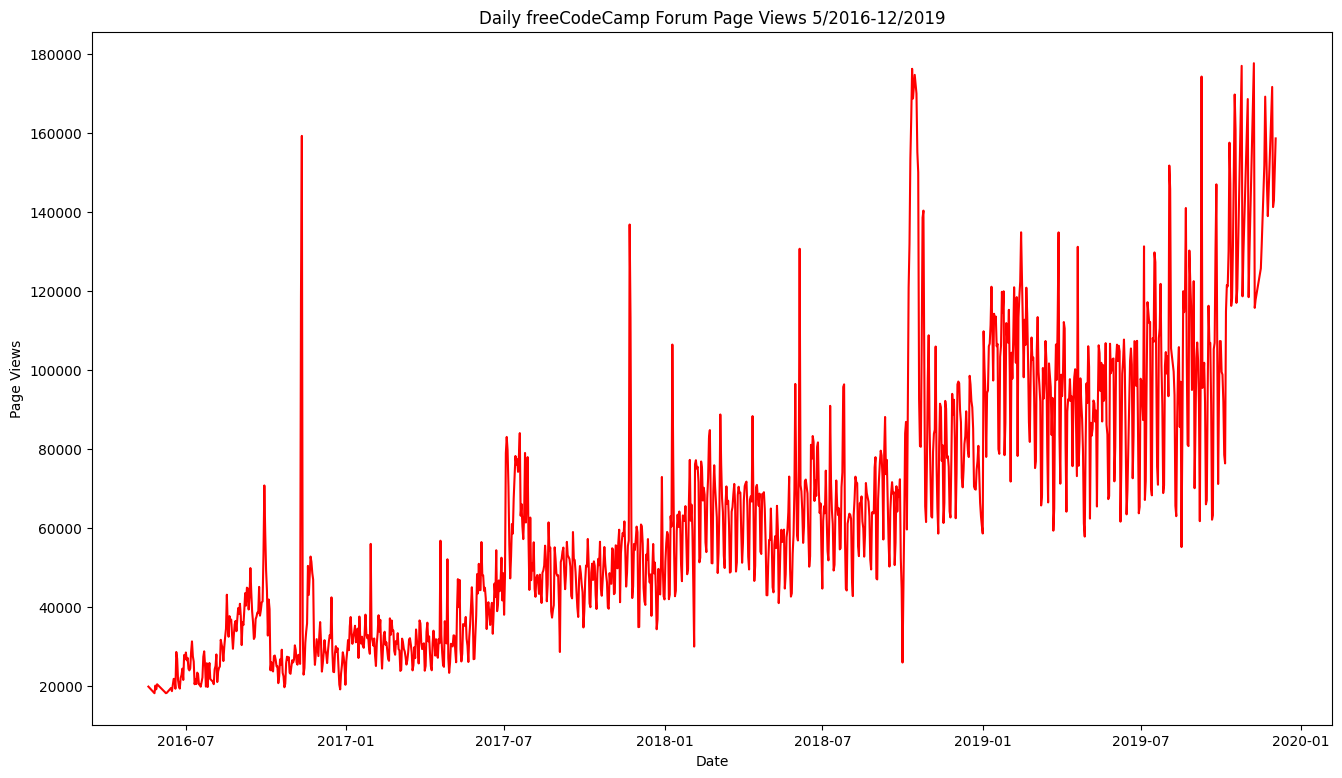

In [5]:
# matplotlib
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(df.index, df['value'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

## fig 02

In [6]:
# Prepare data for bar plot
df_01 = df.copy()
df_01['year'] = df_01.index.year
df_01['month'] = df_01.index.month
df_01['Month'] = df_01.index.month_name()
df_01 = df_01.groupby(['year', 'month', 'Month'])['value'].agg(['mean']).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Text(0, 0.5, 'Average Page Views')

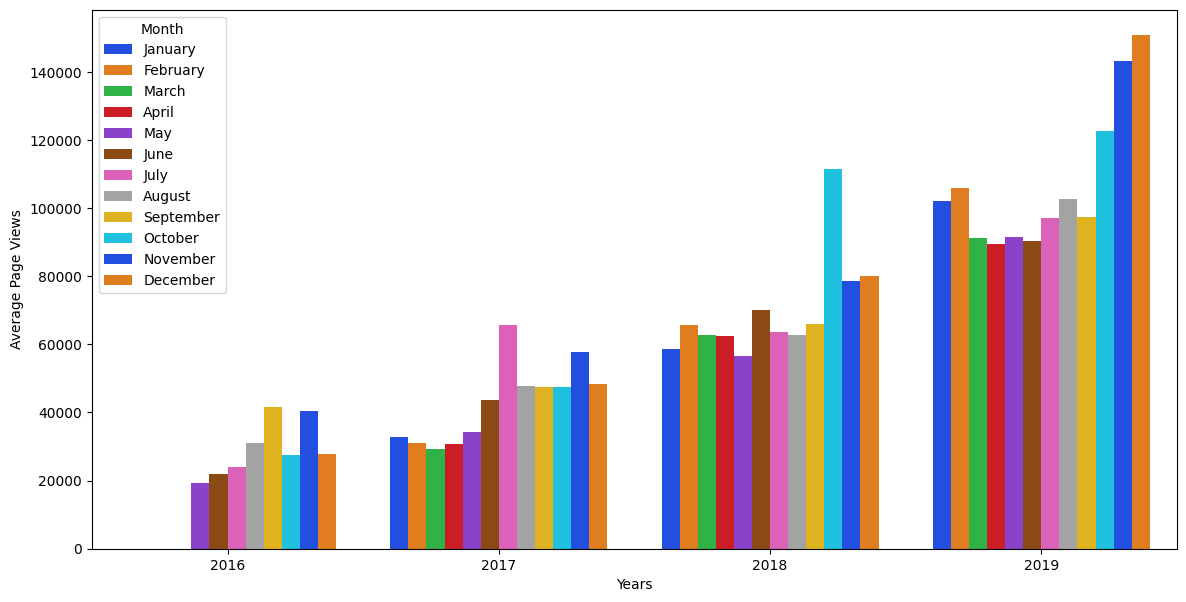

In [7]:
# drawing bar plot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=df_01, x='year', y='mean', hue='Month', palette='bright', hue_order=month_order)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

## fig 03

In [50]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

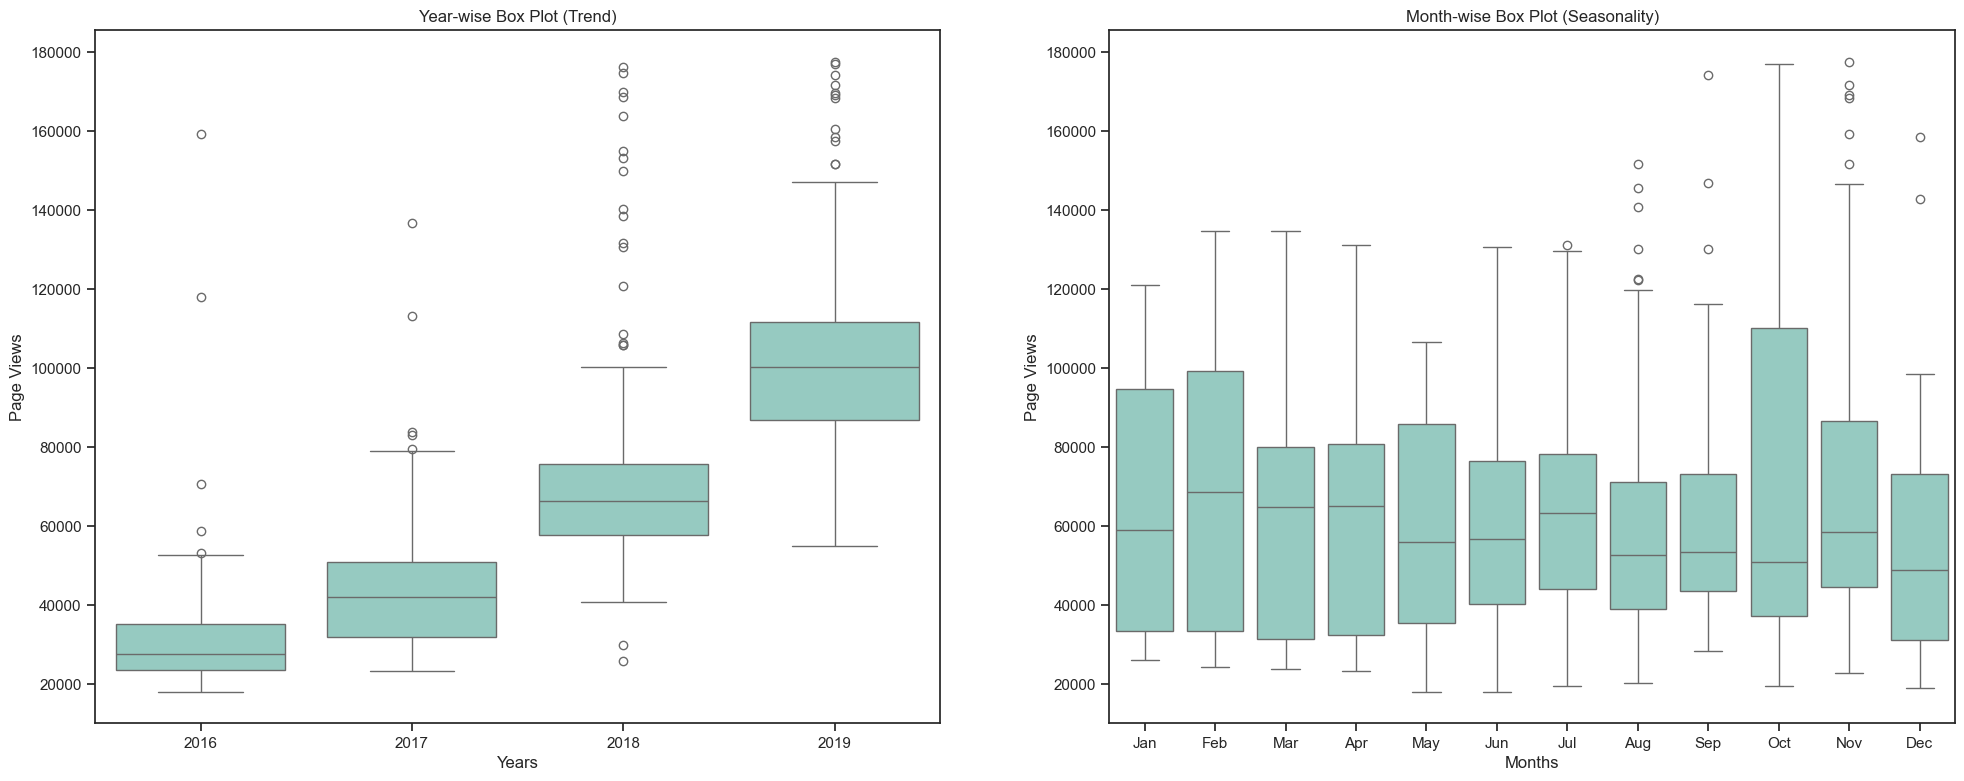

In [51]:
# Draw bar plot
fig, axs = plt.subplots(ncols=2, figsize=(24, 9))
# plot 01
sns.boxplot(data=df_box, x='year', y='value', ax=axs[0])
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Page Views')
axs[0].set_title('Year-wise Box Plot (Trend)')
# plot 02 
sns.boxplot(data=df_box, x='month', y='value',  ax=axs[1], order=month_order)
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Page Views')
axs[1].set_title('Month-wise Box Plot (Seasonality)')

In [46]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec
